#  ML model that will predict likelihood of getting H1B approved 
  
### Goal of the Project

The goal of my project is to answer the following question: Is it possible to predict if an H1B application will be Certified or not given the selected company sponsor/job title/duration?
 

### Variables

The project will focus on Company sponsor (Employers), Job Title, process Duration, salaries to start of. Note that to calculate the Duration, Decision Date and Case submitted date are used.

### Sample Date

From the original data (650K observations), a random sample of 7K observations was drawn for the purpose of performing the analysis

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import pylab
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [2]:
data_eda = pd.read_excel("/Users/sheikita/Desktop/data/H-1B_EDAco.xlsx")

In [3]:
data_eda.head(20)

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_ADDRESS,...,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,PUBLIC_DISCLOSURE_LOCATION,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE
0,I-200-18026-338377,CERTIFIED,2018-01-29,2018-02-02,H-1B,2018-07-28,2021-07-27,MICROSOFT CORPORATION,NaN,1 MICROSOFT WAY,...,N,N,NaN,NaN,NaN,REDMOND,KING,WA,98052,NaT
1,I-200-17296-353451,CERTIFIED,2017-10-23,2017-10-27,H-1B,2017-11-06,2020-11-06,ERNST & YOUNG U.S. LLP,NaN,200 PLAZA DRIVE,...,N,N,NaN,NaN,NaN,SANTA CLARA,SAN JOSE,CA,95110,NaT
2,I-200-18242-524477,CERTIFIED,2018-08-30,2018-09-06,H-1B,2018-09-10,2021-09-09,LOGIXHUB LLC,NaN,320 DECKER DRIVE,...,N,N,NaN,NaN,NaN,IRVING,DALLAS,TX,75062,NaT
3,I-200-18243-850522,CERTIFIED,2018-08-31,2018-09-07,H-1B,2018-09-07,2021-09-06,"ECLOUD LABS,INC.",NaN,120 S WOOD AVENUE,...,Y,N,Y,Y,NaN,BIRMINGHAM,SHELBY,AL,35244,NaT
4,I-200-18142-939501,CERTIFIED,2018-05-22,2018-05-29,H-1B,2018-05-29,2021-05-28,OBERON IT,NaN,1404 W WALNUT HILL LN,...,Y,N,Y,NaN,NaN,SUNRISE,BROWARD,FL,33323,NaT
5,I-200-18121-552858,CERTIFIED,2018-05-01,2018-05-07,H-1B,2018-05-02,2018-10-26,ICONSOFT INC.,NaN,101 CAMBRIDGE STREET SUITE 360,...,Y,N,Y,NaN,NaN,JACKSONVILLE,DUVAL COUNTY,FL,32202,NaT
6,I-200-18215-849606,CERTIFIED,2018-08-03,2018-08-09,H-1B,2018-08-11,2021-08-11,COGNIZANT TECHNOLOGY SOLUTIONS US CORP,NaN,211 QUALITY CIRCLE,...,Y,N,Y,NaN,NaN,OWINGS MILLS,BALTIMORE,MD,21117,NaT
7,I-201-17339-472823,CERTIFIED,2017-12-08,2017-12-14,H-1B1 Chile,2017-12-08,2019-06-07,ISHI SYSTEMS INC,NaN,185 HUDSON STREET,...,NaN,NaN,NaN,NaN,NaN,JERSEY CITY,HUDSON,NJ,07311,NaT
8,I-200-18233-239931,CERTIFIED,2018-08-21,2018-08-27,H-1B,2018-09-05,2021-09-04,"WB SOLUTIONS, LLC",NaN,7320 E FLETCHER AVE,...,Y,N,Y,Y,NaN,ALPHARETTA,FULTON,GA,30005,NaT
9,I-200-18059-006093,CERTIFIED,2018-02-28,2018-03-06,H-1B,2018-05-15,2021-05-15,INFOSTRETCH CORPORATION,NaN,"3200 PATRICK HENRY DRIVE, SUITE 250",...,Y,N,Y,Y,NaN,PLEASANTON,ALAMEDA,CA,94588,NaT


In [5]:
data_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7001 entries, 0 to 7000
Data columns (total 52 columns):
CASE_NUMBER                    7001 non-null object
CASE_STATUS                    7001 non-null object
CASE_SUBMITTED                 7001 non-null datetime64[ns]
DECISION_DATE                  7001 non-null datetime64[ns]
VISA_CLASS                     7001 non-null object
EMPLOYMENT_START_DATE          7000 non-null datetime64[ns]
EMPLOYMENT_END_DATE            7000 non-null datetime64[ns]
EMPLOYER_NAME                  7001 non-null object
EMPLOYER_BUSINESS_DBA          791 non-null object
EMPLOYER_ADDRESS               7001 non-null object
EMPLOYER_CITY                  7001 non-null object
EMPLOYER_STATE                 7001 non-null object
EMPLOYER_POSTAL_CODE           7001 non-null object
EMPLOYER_COUNTRY               7001 non-null object
EMPLOYER_PROVINCE              39 non-null object
EMPLOYER_PHONE                 7001 non-null int64
EMPLOYER_PHONE_EXT             35

In [4]:
data_eda['DURATION'] = data_eda['DECISION_DATE'] - data_eda['CASE_SUBMITTED']

In [7]:
data_eda.head(20)

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_ADDRESS,...,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,PUBLIC_DISCLOSURE_LOCATION,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE,DURATION
0,I-200-18026-338377,CERTIFIED,2018-01-29,2018-02-02,H-1B,2018-07-28,2021-07-27,MICROSOFT CORPORATION,NaN,1 MICROSOFT WAY,...,N,NaN,NaN,NaN,REDMOND,KING,WA,98052,NaT,4 days
1,I-200-17296-353451,CERTIFIED,2017-10-23,2017-10-27,H-1B,2017-11-06,2020-11-06,ERNST & YOUNG U.S. LLP,NaN,200 PLAZA DRIVE,...,N,NaN,NaN,NaN,SANTA CLARA,SAN JOSE,CA,95110,NaT,4 days
2,I-200-18242-524477,CERTIFIED,2018-08-30,2018-09-06,H-1B,2018-09-10,2021-09-09,LOGIXHUB LLC,NaN,320 DECKER DRIVE,...,N,NaN,NaN,NaN,IRVING,DALLAS,TX,75062,NaT,7 days
3,I-200-18243-850522,CERTIFIED,2018-08-31,2018-09-07,H-1B,2018-09-07,2021-09-06,"ECLOUD LABS,INC.",NaN,120 S WOOD AVENUE,...,N,Y,Y,NaN,BIRMINGHAM,SHELBY,AL,35244,NaT,7 days
4,I-200-18142-939501,CERTIFIED,2018-05-22,2018-05-29,H-1B,2018-05-29,2021-05-28,OBERON IT,NaN,1404 W WALNUT HILL LN,...,N,Y,NaN,NaN,SUNRISE,BROWARD,FL,33323,NaT,7 days
5,I-200-18121-552858,CERTIFIED,2018-05-01,2018-05-07,H-1B,2018-05-02,2018-10-26,ICONSOFT INC.,NaN,101 CAMBRIDGE STREET SUITE 360,...,N,Y,NaN,NaN,JACKSONVILLE,DUVAL COUNTY,FL,32202,NaT,6 days
6,I-200-18215-849606,CERTIFIED,2018-08-03,2018-08-09,H-1B,2018-08-11,2021-08-11,COGNIZANT TECHNOLOGY SOLUTIONS US CORP,NaN,211 QUALITY CIRCLE,...,N,Y,NaN,NaN,OWINGS MILLS,BALTIMORE,MD,21117,NaT,6 days
7,I-201-17339-472823,CERTIFIED,2017-12-08,2017-12-14,H-1B1 Chile,2017-12-08,2019-06-07,ISHI SYSTEMS INC,NaN,185 HUDSON STREET,...,NaN,NaN,NaN,NaN,JERSEY CITY,HUDSON,NJ,07311,NaT,6 days
8,I-200-18233-239931,CERTIFIED,2018-08-21,2018-08-27,H-1B,2018-09-05,2021-09-04,"WB SOLUTIONS, LLC",NaN,7320 E FLETCHER AVE,...,N,Y,Y,NaN,ALPHARETTA,FULTON,GA,30005,NaT,6 days
9,I-200-18059-006093,CERTIFIED,2018-02-28,2018-03-06,H-1B,2018-05-15,2021-05-15,INFOSTRETCH CORPORATION,NaN,"3200 PATRICK HENRY DRIVE, SUITE 250",...,N,Y,Y,NaN,PLEASANTON,ALAMEDA,CA,94588,NaT,6 days


In [5]:
eda_h = data_eda[['DURATION','CASE_STATUS','EMPLOYER_NAME', 'JOB_TITLE', 'SOC_CODE']]
eda_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7001 entries, 0 to 7000
Data columns (total 5 columns):
DURATION         7001 non-null timedelta64[ns]
CASE_STATUS      7001 non-null object
EMPLOYER_NAME    7001 non-null object
JOB_TITLE        7001 non-null object
SOC_CODE         6999 non-null object
dtypes: object(4), timedelta64[ns](1)
memory usage: 273.6+ KB


In [6]:
eda_h.describe()

,DURATION
count,7001
mean,42 days 15:31:32.815312
std,157 days 01:49:58.645732
min,0 days 00:00:00
25%,5 days 00:00:00
50%,6 days 00:00:00
75%,6 days 00:00:00
max,1963 days 00:00:00


In [7]:
eda_h = eda_h.fillna({"SOC_CODE": 0})
eda_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7001 entries, 0 to 7000
Data columns (total 5 columns):
DURATION         7001 non-null timedelta64[ns]
CASE_STATUS      7001 non-null object
EMPLOYER_NAME    7001 non-null object
JOB_TITLE        7001 non-null object
SOC_CODE         7001 non-null object
dtypes: object(4), timedelta64[ns](1)
memory usage: 273.6+ KB


In [9]:
eda_h['CASE_STATUS'] = eda_h['CASE_STATUS'].astype('category')
eda_h['EMPLOYER_NAME'] = eda_h['EMPLOYER_NAME'].astype('category')
eda_h['JOB_TITLE'] = eda_h['JOB_TITLE'].astype('category')
eda_h['SOC_CODE'] = eda_h['SOC_CODE'].astype('category')

In [10]:
# Converting Duration to a float data type. 
eda_h['DURATION'] = eda_h['DURATION']/ np.timedelta64(1, 'h')

In [11]:
eda_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7001 entries, 0 to 7000
Data columns (total 5 columns):
DURATION         7001 non-null float64
CASE_STATUS      7001 non-null category
EMPLOYER_NAME    7001 non-null category
JOB_TITLE        7001 non-null category
SOC_CODE         7001 non-null category
dtypes: category(4), float64(1)
memory usage: 403.2 KB


In [12]:
#Current unit of Duration is hours 
eda_h.DURATION

0        96.0
1        96.0
2       168.0
3       168.0
4       168.0
5       144.0
6       144.0
7       144.0
8       144.0
9       144.0
10      144.0
11      144.0
12       96.0
13      144.0
14      144.0
15      144.0
16       96.0
17       96.0
18       48.0
19       96.0
20      144.0
21      120.0
22      144.0
23      144.0
24       96.0
25       24.0
26      120.0
27      144.0
28      144.0
29      120.0
        ...  
6971    144.0
6972    168.0
6973    168.0
6974    144.0
6975    144.0
6976    144.0
6977    144.0
6978    144.0
6979    168.0
6980    144.0
6981    144.0
6982     96.0
6983    144.0
6984    168.0
6985    168.0
6986    144.0
6987     96.0
6988    144.0
6989    144.0
6990    168.0
6991     48.0
6992     96.0
6993     96.0
6994     96.0
6995     96.0
6996     48.0
6997    168.0
6998    168.0
6999    144.0
7000    168.0
Name: DURATION, Length: 7001, dtype: float64

### Statistical Inference Analysis on variable: Duration

In [13]:
# ECDF Function

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x: sort the data
    x = np.sort(data)

    # y: range for y-axis
    y = np.arange(1, n+1) / n

    return x, y

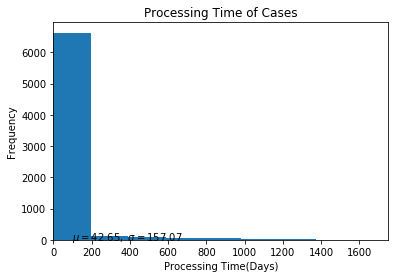

In [14]:
# Plot a histogram 
duration = (eda_h.DURATION)/24  # To convert the hours to days

# plot hist
_ = plt.hist(duration, bins=10)

# labels
_ = plt.text(95.5, 0.5, r'$\mu= {},\ \sigma={}$'.format(round(np.mean(duration), 2), round(np.std(duration), 2)))
_ = plt.xlabel('Processing Time(Days)')
_ = plt.ylabel('Frequency')
_ = plt.title('Processing Time of Cases')

margins = 0.02
plt.xlim(0, 1750)
plt.show();

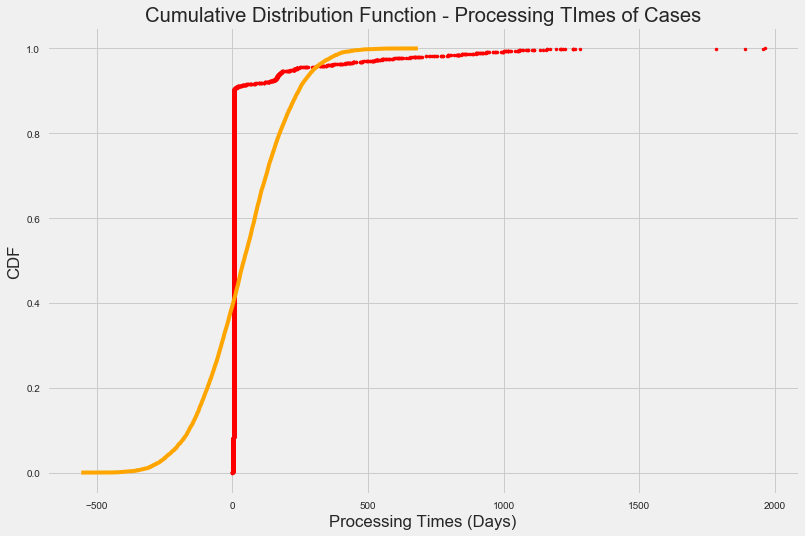

In [15]:
sns.set(rc={"figure.figsize": (12, 8)})
plt.style.use('fivethirtyeight')

# Plot the CDFs
x, y = ecdf(duration)

# draw 10k random samples from a normal distribution
nm_duration = np.random.normal(np.mean(duration), np.std(duration), 10000)
nm_x, nm_y = ecdf(nm_duration)

_ = plt.plot(x, y, marker='.', linestyle='none', color = 'red')
_ = plt.plot(nm_x, nm_y, color = 'orange')

_ = plt.xlabel('Processing Times (Days)')
_ = plt.ylabel('CDF')
_ = plt.title('Cumulative Distribution Function - Processing TImes of Cases')
margins = 0.02

plt.show();

From using the cumulative distribution function (CDF), I can conclude that observations belonging to the Duration variable (processing times) tend to a Normal Distribution.

Using the Central Limit Theorem as my reference, the sample selected was RSS. trepresents less than 10% of the my population data and sample size is more than 30. 

### Is it possible that the processing time can be less than Average of 42.65 days?
#### Ho: μ <= 42.65 days and Ha: μ >= 42.5 days

In [16]:
## Use Z-statistics with 1 tail at Z value of 1.96 (alpha =0.5)
pro_mean = np.mean(duration)
pro_s1 = np.std(duration)/np.sqrt(7001)

#From reviewing the available processing times at USCIS site ranges, selected a population mean of 40 days  
z_pro =(42.65 - 40)/pro_s1  
print('Z score:{:.05}'.format(z_pro))


Z score:1.4117


#### Analysis
The result from the Z test indicates that I do not rejet the Null Hypothesis with a confidence of 95%. It opens the door to potential improvements on the processing time.

### Analysis on Categorical variables

In [17]:
# Assign a classification (categories) to the Case Status and Soc Code
eda_h["C_cat"] = eda_h["CASE_STATUS"].cat.codes
eda_h["S_cat"] = eda_h["SOC_CODE"].cat.codes
eda_h.head()

,DURATION,CASE_STATUS,EMPLOYER_NAME,JOB_TITLE,SOC_CODE,C_cat,S_cat
0,96.0,CERTIFIED,MICROSOFT CORPORATION,SOFTWARE ENGINEER,15-1132,0,55
1,96.0,CERTIFIED,ERNST & YOUNG U.S. LLP,TAX SENIOR,13-2011,0,39
2,168.0,CERTIFIED,LOGIXHUB LLC,DATABASE ADMINISTRATOR,15-1141,0,58
3,168.0,CERTIFIED,"ECLOUD LABS,INC.",MICROSOFT DYNAMICS CRM APPLICATION DEVELOPER,15-1132,0,55
4,168.0,CERTIFIED,OBERON IT,SENIOR SYSTEM ARCHITECT,15-1132,0,55


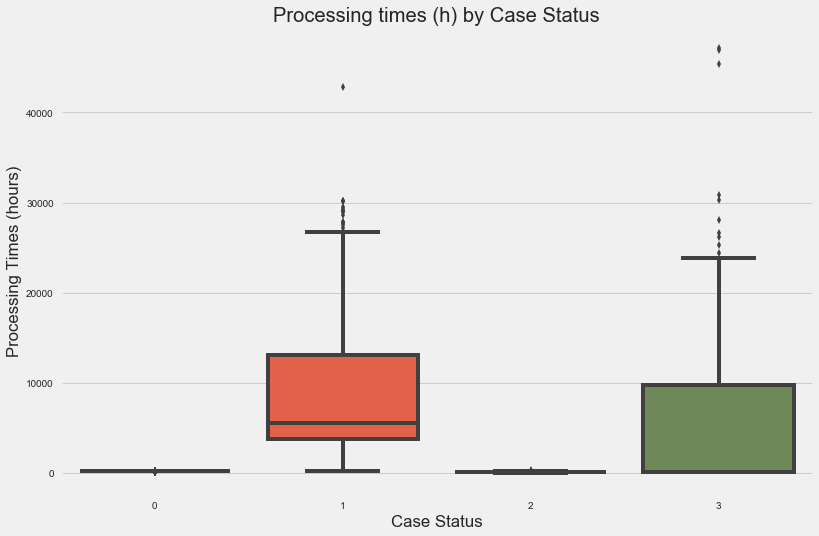

In [33]:
sns.boxplot(x = 'C_cat', y = 'DURATION', data=eda_h)

sns.set(rc={"figure.figsize": (12, 8)})
plt.style.use('fivethirtyeight')

_ = plt.xlabel('Case Status')
_ = plt.ylabel('Processing Times (hours)')
_ = plt.title('Processing times (h) by Case Status')
plt.show()

In [19]:
# Counting how many times the SOC code was in the sample
codes= eda_h["S_cat"].value_counts()
topcodes = codes.head(10)
print(topcodes)

55     2202
52      487
62      377
211     367
56      328
8       197
78      174
39      151
42      141
4       102
Name: S_cat, dtype: int64


In [20]:
eda_h['CASE_STATUS'].value_counts()

CERTIFIED              5330
DENIED                  908
CERTIFIED-WITHDRAWN     637
WITHDRAWN               126
Name: CASE_STATUS, dtype: int64

Text(0.5,0.98,'Histogram: Top 5 Job Titles')

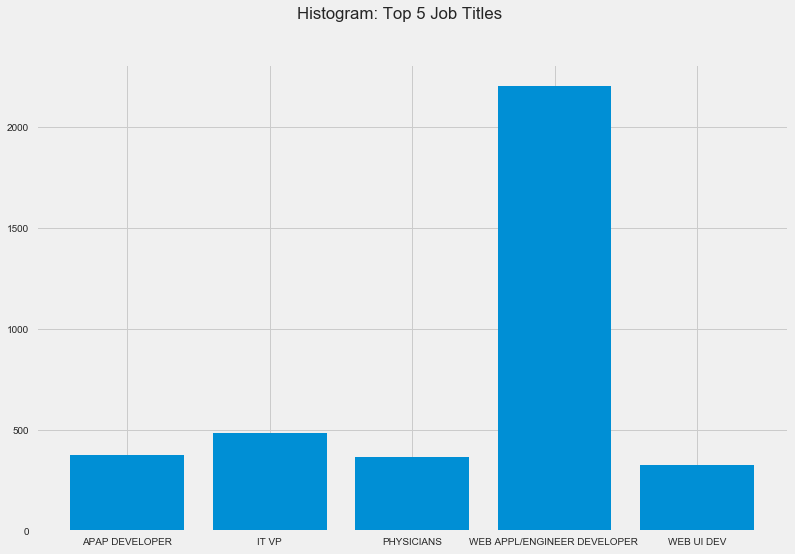

In [21]:
#Histogram of the Top 5 Job Titles in H1B Visa application
top_codes = {'WEB APPL/ENGINEER DEVELOPER ': 2202, 'IT VP': 487, 'APAP DEVELOPER':377,  'PHYSICIANS': 367, 
        'WEB UI DEV': 328}
nam_e = list(top_codes.keys())
val_e = list(top_codes.values())

fig, ax = plt.subplots()
ax.bar(nam_e, val_e)
fig.suptitle('Histogram: Top 5 Job Titles')

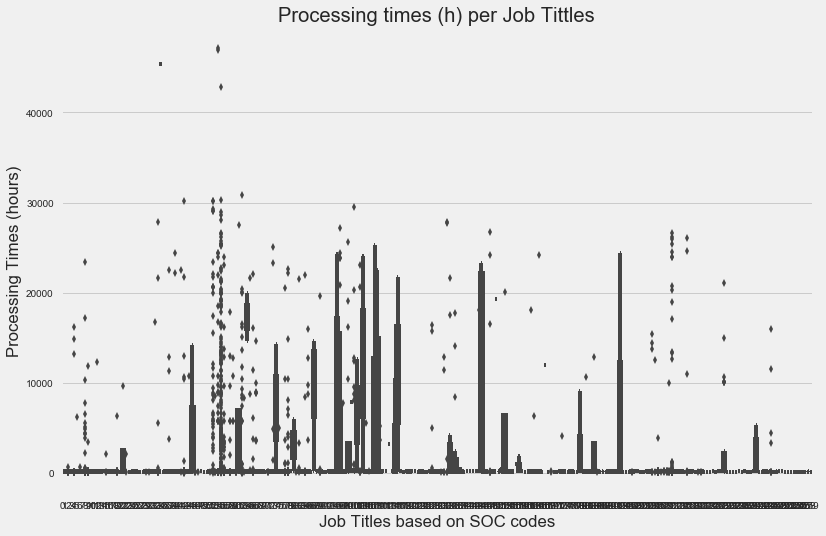

In [61]:
# Plot the Processing times for all Job C
sns.boxplot(x = 'S_cat', y = 'DURATION', data= eda_h)

sns.set(rc={"figure.figsize": (12, 8)})
plt.style.use('fivethirtyeight')

_ = plt.xlabel('Job Titles based on SOC codes')
_ = plt.ylabel('Processing Times (hours)')
_ = plt.title('Processing times (h) per Job Tittles')
plt.show()

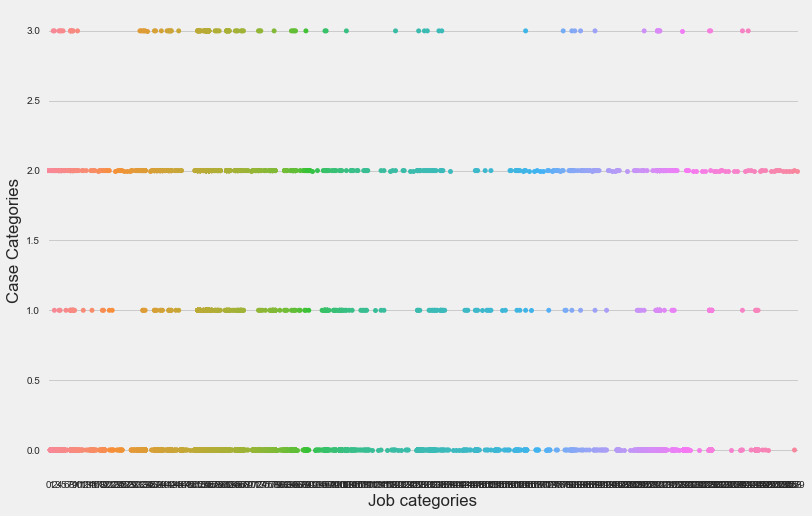

In [24]:
#Plot Job tittles using SOC codes to find out the Status 
_ = sns.swarmplot(x = 'S_cat', y ='C_cat', data = eda_h)
_ = plt.xlabel('Job categories')
_ = plt.ylabel('Case Categories')

margins = 0.02
plt.show()

In [25]:
corr_df = pd.read_excel("/Users/sheikita/Desktop/data/Correlation.xlsx")
corr_df.head(20)

,SOC CODE,CASE_NUMBER,SUM DURATION (Hours)
0,55,2202,101740
1,52,487,21617
2,211,367,14391
3,54,99,12927
4,96,67,11482
5,62,377,11198
6,56,328,7570
7,78,174,5236
8,8,197,5013
9,101,36,4453


In [26]:
corr_df = corr_df.rename(columns = {'CASE_NUMBER':'SOC_counts'})

In [27]:
corr_df = corr_df.rename(columns = {'SUM DURATION (Hours)':'Duration SUM'})

In [28]:
corr_df.reset_index()

,index,SOC CODE,SOC_counts,Duration SUM
0,0,55,2202,101740
1,1,52,487,21617
2,2,211,367,14391
3,3,54,99,12927
4,4,96,67,11482
5,5,62,377,11198
6,6,56,328,7570
7,7,78,174,5236
8,8,8,197,5013
9,9,101,36,4453


#### Analysis
The above calculation indicates that job category (55) equal to Software Developers, Applications (based on SOC code) is the job that most employers are trying to fill. Thus, takes has the longest processing time. 

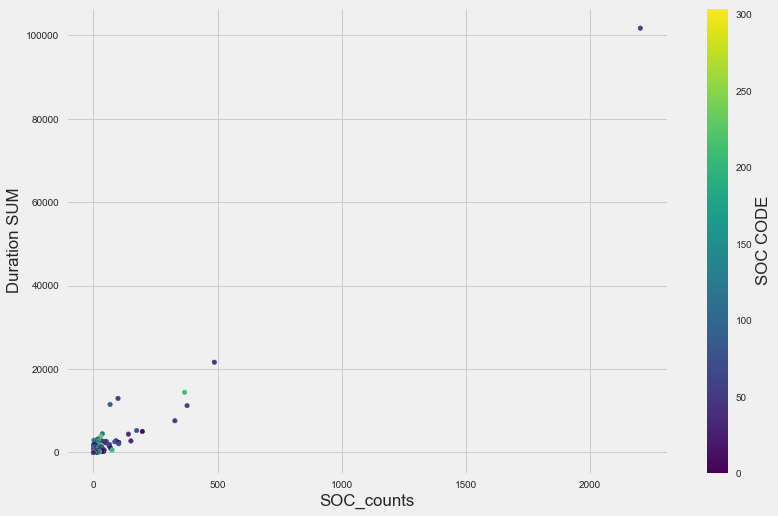

In [29]:
ax1 = corr_df.plot.scatter(x='SOC_counts', y = 'Duration SUM', c='SOC CODE', colormap='viridis')

In [30]:
corr = corr_df.corr(method='pearson')
print(corr)

              SOC CODE  SOC_counts  Duration SUM
SOC CODE      1.000000   -0.098238     -0.084718
SOC_counts   -0.098238    1.000000      0.982424
Duration SUM -0.084718    0.982424      1.000000


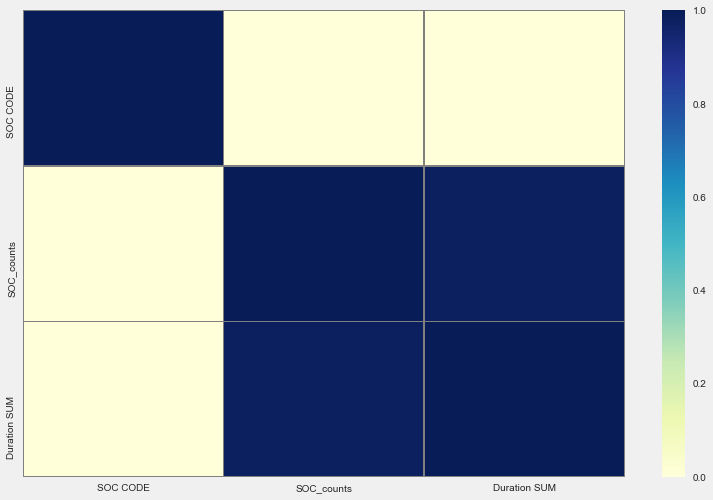

In [31]:
sns.heatmap(corr, vmin=0, vmax=1, linecolor = 'grey', linewidths = .5, cmap="YlGnBu", xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()

The resulting correlation on the variables:  count job titles and how long it takes to process them is positive and very close to 1. Thus,  both variables have a stronger linear relationship.  

In [32]:
corr = corr_df.corr(method='spearman')
print(corr)

              SOC CODE  SOC_counts  Duration SUM
SOC CODE      1.000000   -0.404217     -0.390191
SOC_counts   -0.404217    1.000000      0.840691
Duration SUM -0.390191    0.840691      1.000000
